Solving questions from: [2022 hw - week 8](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2022/08-deep-learning/homework.md)

# Section 1

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

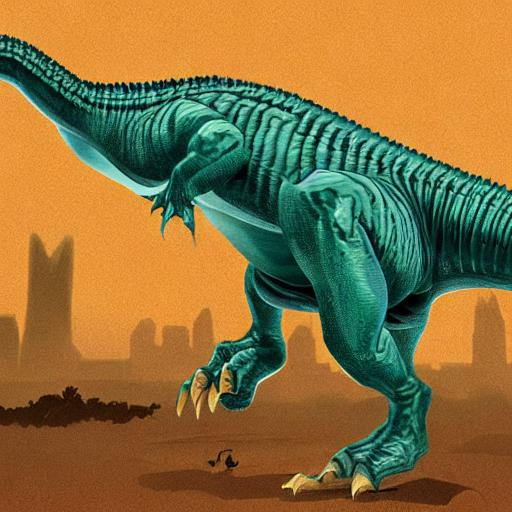

In [2]:
path = 'data/dino-dragon/train/dino'
name = '0a0b3e8f-d08f-4ef7-a94a-a090b1363074.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [3]:
sample_dino = load_img(fullname)
sample_dino.size

(512, 512)

In [4]:
inputs = tf.keras.Input(shape=(150, 150, 3))
conv = tf.keras.layers.Conv2D(32, 3, activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)
dense = tf.keras.layers.Dense(64, activation='relu')(flat)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)
model = tf.keras.Model(inputs, outputs)

## Question 1

Since we have a binary classification problem, what is the best loss function for us?


In [5]:
optim = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

**Answer**: `binary cross-entropy`

## Question 2

What's the total number of parameters of the model? You can use the `summary` method for that. 

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

**Answer**: 11215873 

# Section 2

## Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/dino-dragon/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    'data/dino-dragon/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
80/80 [==============================] - 26s 318ms/step - loss: 0.6076 - accuracy: 0.6612 - val_loss: 0.4785 - val_accuracy: 0.7919
Epoch 2/10
80/80 [==============================] - 27s 332ms/step - loss: 0.4358 - accuracy: 0.8218 - val_loss: 0.4089 - val_accuracy: 0.8147
Epoch 3/10
80/80 [==============================] - 27s 331ms/step - loss: 0.3600 - accuracy: 0.8595 - val_loss: 0.3619 - val_accuracy: 0.8426
Epoch 4/10
80/80 [==============================] - 25s 308ms/step - loss: 0.3250 - accuracy: 0.8689 - val_loss: 0.3207 - val_accuracy: 0.8655
Epoch 5/10
80/80 [==============================] - 28s 346ms/step - loss: 0.2913 - accuracy: 0.8871 - val_loss: 0.3244 - val_accuracy: 0.8579
Epoch 6/10
80/80 [==============================] - 24s 297ms/step - loss: 0.2469 - accuracy: 0.9072 - val_loss: 0.3035 - val_accuracy: 0.8629
Epoch 7/10
80/80 [==============================] - 23s 293ms/step - loss: 0.2283 - accuracy: 0.9122 - val_loss: 0.2911 - val_accuracy: 0.8731

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Question 3

What is the median of training accuracy for all the epochs for this model?

In [16]:
np.median(np.array(history.history['accuracy']))

0.8971141874790192

**Answer**: 0.90

## Question 4

What is the standard deviation of training loss for all the epochs for this model?

In [17]:
np.array(history.history['loss']).std()

0.13302295267730804

**Answer**: 0.11

# Section 3

## Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    'data/dino-dragon/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.


## Question 5 

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

In [21]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
80/80 [==============================] - 32s 402ms/step - loss: 0.4632 - accuracy: 0.7785 - val_loss: 0.6498 - val_accuracy: 0.7107
Epoch 2/10
80/80 [==============================] - 31s 392ms/step - loss: 0.4217 - accuracy: 0.8118 - val_loss: 0.5528 - val_accuracy: 0.7614
Epoch 3/10
80/80 [==============================] - 30s 376ms/step - loss: 0.4267 - accuracy: 0.8112 - val_loss: 0.2790 - val_accuracy: 0.8706
Epoch 4/10
80/80 [==============================] - 30s 377ms/step - loss: 0.4024 - accuracy: 0.8275 - val_loss: 0.3800 - val_accuracy: 0.8325
Epoch 5/10
80/80 [==============================] - 31s 383ms/step - loss: 0.3940 - accuracy: 0.8262 - val_loss: 0.6342 - val_accuracy: 0.7386
Epoch 6/10
80/80 [==============================] - 30s 379ms/step - loss: 0.3664 - accuracy: 0.8519 - val_loss: 0.4613 - val_accuracy: 0.8046
Epoch 7/10
80/80 [==============================] - 30s 379ms/step - loss: 0.3777 - accuracy: 0.8388 - val_loss: 0.6918 - val_accuracy: 0.7132

In [22]:
np.array(history.history['val_loss']).mean()

0.5315383076667786

**Answer**: ~ 0.37

## Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

In [25]:
np.array(history.history['val_accuracy'])[5:].mean()

0.7715736031532288

**Answer**: ~ 0.84